# Iris Flower - Batch Prediction


In this notebook we will, 

1. Load the batch inference data that arrived in the last 24 hours
2. Predict the first Iris Flower found in the batch
3. Write the ouput png of the Iris flower predicted, to be displayed in Github Pages.

In [4]:
import pandas as pd
import hopsworks
import joblib

project = hopsworks.login() # login to Hopsworks
fs = project.get_feature_store() # get the feature store

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/2289
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
mr = project.get_model_registry()
model = mr.get_model("iris", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

Connected. Call `.close()` to terminate connection gracefully.

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [6]:
feature_view = fs.get_feature_view(name="iris", version=1)

Now we will do some **Batch Inference**. 

We will read all the input features that have arrived in the last 24 hours, and score them.

In [7]:
import datetime
from PIL import Image

batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)

y_pred

2022-10-10 13:04:49,631 INFO: USE `bensnows_featurestore`
2022-10-10 13:04:50,604 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`
FROM `bensnows_featurestore`.`iris_1` `fg0`


array(['Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Versicol

In [8]:
batch_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.700000,3.800000,1.700000,0.300000
1,5.600000,2.700000,4.200000,1.300000
2,6.300000,3.300000,6.000000,2.500000
3,6.000000,2.900000,4.500000,1.500000
4,5.000000,3.000000,1.600000,0.200000
...,...,...,...,...
181,5.118006,2.748841,3.694070,1.078418
182,4.609999,2.239757,5.074781,1.163552
183,4.589666,2.880149,1.599484,0.599941
184,5.051212,2.862281,1.708026,0.412463


Batch prediction output is the last entry in the batch - it is output as a file 'latest_iris.png'

In [9]:
flower = y_pred[y_pred.size-1]
flower_img = "assets/" + flower + ".png"
img = Image.open(flower_img)            

img.save("../../assets/module1/latest_iris.png")

In [10]:
iris_fg = fs.get_feature_group(name="iris", version=1)
df = iris_fg.read()
df

2022-10-10 13:04:55,340 INFO: USE `bensnows_featurestore`
2022-10-10 13:04:56,319 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`, `fg0`.`variety` `variety`
FROM `bensnows_featurestore`.`iris_1` `fg0`


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.700000,3.800000,1.700000,0.300000,Setosa
1,5.600000,2.700000,4.200000,1.300000,Versicolor
2,6.300000,3.300000,6.000000,2.500000,Virginica
3,6.000000,2.900000,4.500000,1.500000,Versicolor
4,5.000000,3.000000,1.600000,0.200000,Setosa
...,...,...,...,...,...
181,5.118006,2.748841,3.694070,1.078418,Versicolor
182,4.609999,2.239757,5.074781,1.163552,Versicolor
183,4.589666,2.880149,1.599484,0.599941,Setosa
184,5.051212,2.862281,1.708026,0.412463,Setosa


In [11]:
label = df.iloc[-1]["variety"]
label

'Virginica'

In [12]:
label_flower = "assets/" + label + ".png"

img = Image.open(label_flower)            

img.save("../../assets/module1/actual_iris.png")

In [13]:
import pandas as pd
# get or create the feature group
monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                  version=1,
                                  primary_key=["datetime"], # Set the primary key
                                  description="Iris flower Prediction/Outcome Monitoring"
                                 )

In [14]:
from datetime import datetime
now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S") # Get the current time
metadata = {
    'prediction': [flower], # The prediction
    'label': [label], # The ground truth label
    'datetime': [now], # The time of the prediction
}
monitor_df = pd.DataFrame(metadata) # Create a dataframe from the metadata
monitor_fg.insert(monitor_df) # insert into our monitoring feature group

Uploading Dataframe: 100.00% |██████████| Rows 1/1 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/2289/jobs/named/iris_predictions_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x20d5aa22388>, None)

In [15]:
history_df = monitor_fg.read() # Read the monitoring feature group into a dataframe
history_df 

2022-10-10 13:05:58,605 INFO: USE `bensnows_featurestore`
2022-10-10 13:05:59,607 INFO: SELECT `fg0`.`prediction` `prediction`, `fg0`.`label` `label`, `fg0`.`datetime` `datetime`
FROM `bensnows_featurestore`.`iris_predictions_1` `fg0`


,prediction,label,datetime
0,Virginica,Virginica,"10/06/2022, 14:09:17"
1,Setosa,Setosa,"10/06/2022, 14:27:44"
2,Versicolor,Versicolor,"10/06/2022, 14:31:14"
3,Setosa,Setosa,"10/06/2022, 15:17:12"
4,Versicolor,Versicolor,"10/07/2022, 11:32:06"
5,Setosa,Setosa,"10/07/2022, 12:03:33"
6,Setosa,Setosa,"10/08/2022, 11:28:02"
7,Setosa,Setosa,"10/08/2022, 15:53:15"
8,Setosa,Setosa,"10/08/2022, 17:13:17"
9,Virginica,Virginica,"10/08/2022, 20:39:18"


In [16]:
import dataframe_image as dfi # for dataframe snapshot

df_recent = history_df.tail(5) # Get the last 5 predictions
 
# If you exclude this image, you may have the same iris_latest.png and iris_actual.png files
# If no files have changed, the GH-action 'git commit/push' stage fails, failing your GH action (last step)
# This image, however, is always new, ensuring git commit/push will succeed.
dfi.export(df_recent, '../../assets/module1/df_recent.png') # Save the dataframe as an image

In [17]:
from sklearn.metrics import confusion_matrix

predictions = history_df[['prediction']]
labels = history_df[['label']]

results = confusion_matrix(labels, predictions)
print(results)

[[14  0  0]
 [ 0 10  0]
 [ 0  0 14]]


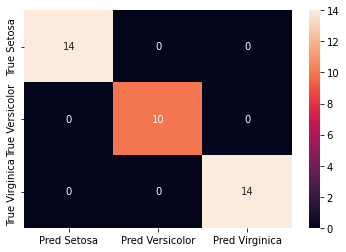

In [18]:
from matplotlib import pyplot
import seaborn as sns

# Only create the confusion matrix when our iris_predictions feature group has examples of all 3 iris flowers
if results.shape == (3,3):

    df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                         ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

    cm = sns.heatmap(df_cm, annot=True)

    fig = cm.get_figure()
    fig.savefig("../../assets/module1/confusion_matrix.png") 
    df_cm
else:
    print("Run the batch inference pipeline more times until you get 3 different iris flowers")    

In [19]:
import plotly.express as px

In [20]:
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="variety", title="Iris Dataset", marginal_y="violin", marginal_x="box", trendline="ols", template="plotly")

In [21]:
fig.add_traces(
    px.scatter(df.tail(1), x="sepal_length", y="sepal_width").update_traces(marker_size=10, marker_color="yellow").data
)

In [23]:
import os
from os import mkdir
if not os.path.exists("../../assets/module1/html"):
    mkdir("../../assets/module1/html")
fig.to_html(full_html=False, include_plotlyjs='cdn')
fig.write_html("../../assets/module1/html/index.html", full_html=False, include_plotlyjs='cdn')

In [24]:
fig.write_image("../../assets/module1/scatter_plot.png")